# Exploratory Data Analysis

In [1]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#from pandas_profiling import ProfileReport
%matplotlib inline

## Load the data

In [2]:
ratings = pd.read_csv('data\\ratings.csv', index_col=0)
users = pd.read_csv('data\\users.csv', index_col=0)
movies = pd.read_csv('data\\movies.csv', index_col=0) 

D:\Program Files\Anaconda\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
print(ratings.head())
print(ratings.shape)

   user_id  movie_id  rating             datetime
0        1      1193       5  2000-12-31 22:12:40
1        1       661       3  2000-12-31 22:35:09
2        1       914       3  2000-12-31 22:32:48
3        1      3408       4  2000-12-31 22:04:35
4        1      2355       5  2001-01-06 23:38:11
(1000209, 4)


In [4]:
print(users.head())
print(users.shape)

   user_id gender  age  occupation zipcode  age_desc              occ_desc
0        1      F    1          10   48067  Under 18          K-12 student
1        2      M   56          16   70072       56+         self-employed
2        3      M   25          15   55117     25-34             scientist
3        4      M   45           7   02460     45-49  executive/managerial
4        5      M   25          20   55455     25-34                writer
(6040, 7)


In [5]:
print(movies.head())
print(movies.shape)

   movie_id                               title                        genres
0         1                    Toy Story (1995)   Animation|Children's|Comedy
1         2                      Jumanji (1995)  Adventure|Children's|Fantasy
2         3             Grumpier Old Men (1995)                Comedy|Romance
3         4            Waiting to Exhale (1995)                  Comedy|Drama
4         5  Father of the Bride Part II (1995)                        Comedy
(3883, 3)


## Create a dataset that contains all information of the 3 tables.

In [6]:
df = pd.merge(pd.merge(movies, ratings,on='movie_id'),users,on='user_id')

In [7]:
df.head()

,movie_id,title,genres,user_id,rating,datetime,gender,age,occupation,zipcode,age_desc,occ_desc
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,2001-01-06 23:37:48,F,1,10,48067,Under 18,K-12 student
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,2001-01-06 23:39:11,F,1,10,48067,Under 18,K-12 student
2,150,Apollo 13 (1995),Drama,1,5,2000-12-31 22:29:37,F,1,10,48067,Under 18,K-12 student
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,2000-12-31 22:12:40,F,1,10,48067,Under 18,K-12 student
4,527,Schindler's List (1993),Drama|War,1,5,2001-01-06 23:36:35,F,1,10,48067,Under 18,K-12 student


## How many times do users rate
On average, a user rate 165 movies.Most of users rate less than 500 times.

[Text(0.5, 0, '# of ratings')]

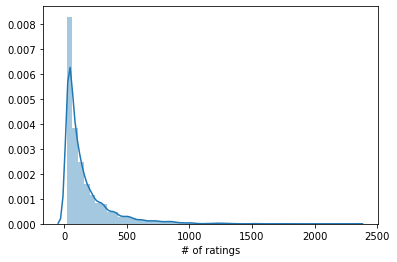

In [8]:
rating_count = ratings.groupby(by='user_id').count()['rating']
rating_counts_plot = sns.distplot(rating_count)
rating_counts_plot.set(xlabel='# of ratings')

In [9]:
ratings.groupby(by='user_id').count()['movie_id'].mean()

165.5975165562914

## Distribution of the ratings
Most ratings are located on 3,4, and 5.However, the same ratings might mean differently for each users. 4 rating for user A could mean "highly recommended", but 4 for user B could be "not so good".The average rating is 3.58

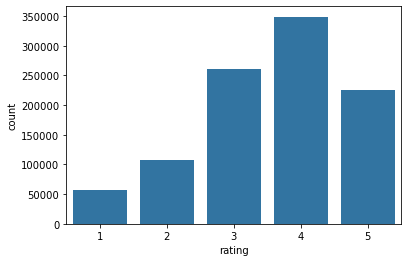

In [10]:
# show the distribution of the ratings
rating_dist = sns.countplot(ratings['rating'],color='C10')

In [11]:
avg_rating = ratings['rating'].mean()
print(avg_rating)

3.581564453029317


## Gender

### Gender distribution
There are significantly more ratings from male users than female users.

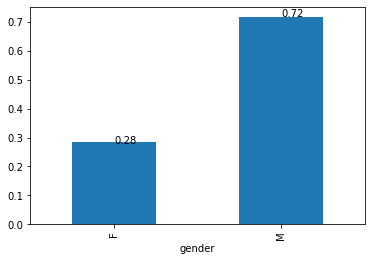

In [12]:
gender = users.groupby(by = 'gender')['user_id'].count()/len(users)
gender.plot(kind='bar')
for index, value in enumerate(gender.tolist()):
    plt.text(index, round(value,2), str(round(value,2)));

### Which gener gives higher ratings
Female tends to give higher ratings than male.Female has an average rating of 3.62 and male has an average rating of 3.56.

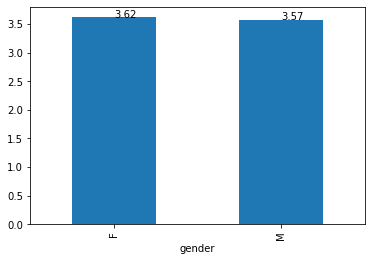

In [13]:
genderrating = df.groupby(by = 'gender')['rating'].mean()
genderrating.plot(kind='bar')
for index, value in enumerate(genderrating.tolist()):
    plt.text(index, round(value,2), str(round(value,2)));

## Occupations

### Occupation distribution
In the user database, College/grad student,executive/managerial, and other occupation consist the most population, and they provide the most ratings. 

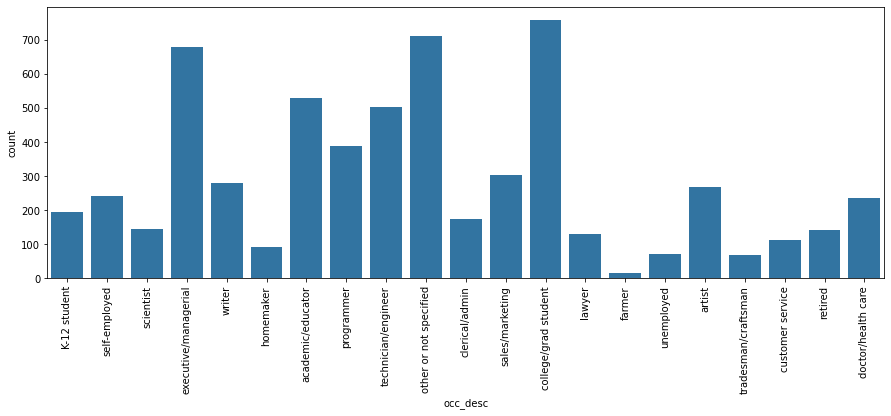

In [14]:
plt.figure(figsize =[15,5])
occ_dist = sns.countplot(users['occ_desc'],color='C10')
plt.xticks(rotation=90);

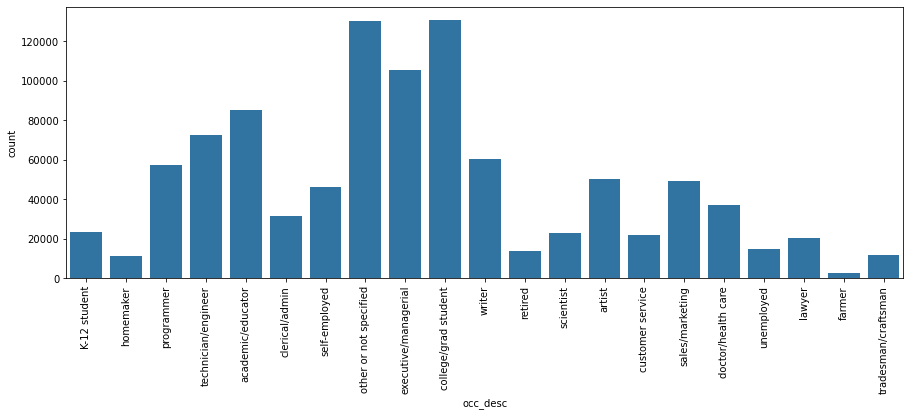

In [15]:
plt.figure(figsize =[15,5])
occ_dist = sns.countplot(df['occ_desc'],color='C10')
plt.xticks(rotation=90);

### Which occupations give higher ratings
Retailed people tends to give the highest ratings.Unemployed tends to give the lowest ratings

In [16]:
occ_ratings = df.groupby(by = 'occ_desc')['rating'].mean()

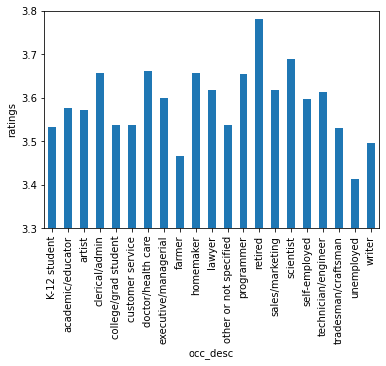

In [17]:
occ_rating_bar = occ_ratings.plot(kind='bar')
plt.ylim(3.3,3.8)
plt.ylabel('ratings');

## Age

### Age distribution
Users between 25-34 are the largest population, and they provide the most ratings. Then 35-44 and 18-24 years old users, they provide the next most ratings.However, I notice here that groups are not equally splitted. Maybe the website wants to keep the number of users in each group to be identical. 

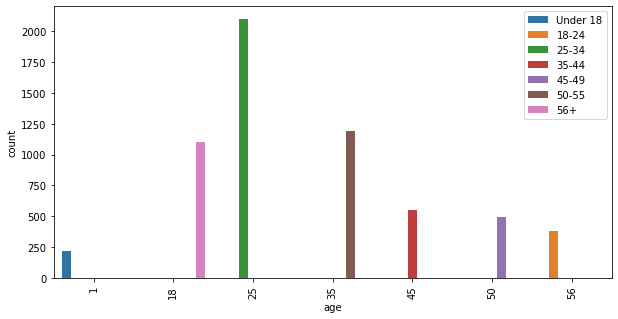

In [18]:
plt.figure(figsize =[10,5])
occ_dist = sns.countplot(users['age'],hue=users['age_desc'])
plt.xticks(rotation=90)
plt.legend(["Under 18", "18-24", "25-34", "35-44", "45-49", "50-55", "56+"]);

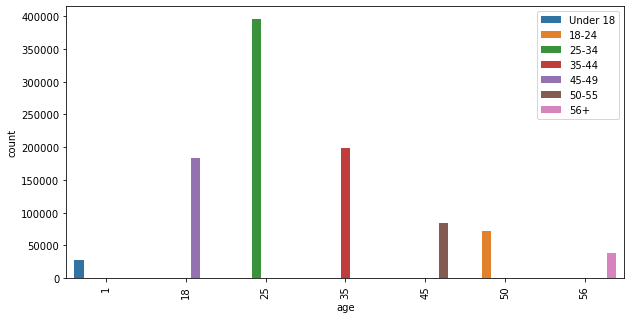

In [19]:
plt.figure(figsize =[10,5])
occ_dist = sns.countplot(df['age'],hue=df['age_desc'])
plt.xticks(rotation=90)
plt.legend(["Under 18", "18-24", "25-34", "35-44", "45-49", "50-55", "56+"]);

### Which age range give higher ratings
People older than 56 years old tends to give highest ratings. People younger than 24 years olf tends to give lovwer ratings.

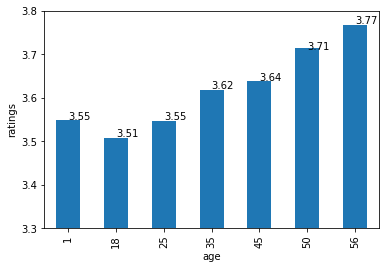

In [20]:
age_ratings = df.groupby(by = 'age')['rating'].mean()
age_rating_bar = age_ratings.plot(kind='bar')
plt.ylim(3.3,3.8)
plt.ylabel('ratings')
for index, value in enumerate(age_ratings.tolist()):
    plt.text(index, round(value,2), str(round(value,2)));

## Genre

### Which genre has the most movies

In [21]:
# Make a census of the genre keywords
genre_labels = set()
for s in movies['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

def encode_genre(genre_lst, genre):
    """
    If the genre is in the genre_lst, then label 1. If not, label 0.
    """
    if genre in genre_lst:
        return 1
    else:
        return 0

    
# Encode the genre column. Make each genre a seperate column, and label 1 if the movie is in this genre. 
for g in genre_labels:
    movies[g] = movies.apply(lambda x:encode_genre(x['genres'].split('|'),g),axis=1)

# 17 genres and 4 original columns. 
print(movies.shape)
movies.head()

(3883, 21)


,movie_id,title,genres,Animation,Crime,War,Action,Musical,Drama,Adventure,...,Documentary,Romance,Film-Noir,Western,Fantasy,Thriller,Mystery,Children's,Horror,Comedy
0,1,Toy Story (1995),Animation|Children's|Comedy,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,2,Jumanji (1995),Adventure|Children's|Fantasy,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,4,Waiting to Exhale (1995),Comedy|Drama,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [22]:
# Check if it encoded right
#movies['genre_len'] = movies['genres'].str.split('|').str.len()
#movies['encode_len'] = movies.iloc[:,3:-1].sum(axis=1)
#comparison_column = np.where(movies["genre_len"] == movies["encode_len"], True, False)
#comparison_column.sum()

The top 3 genre with the most movies are Drama, Comedy and Action. The Film-Noir has the least movies.

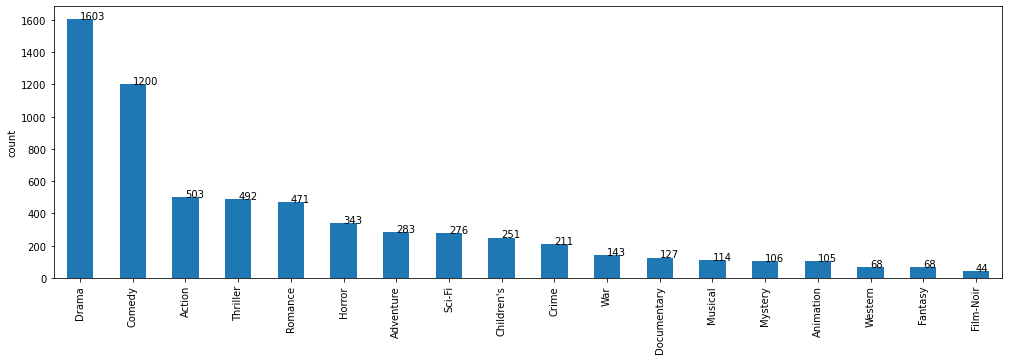

In [23]:
genre_number = movies.iloc[:,3:].sum(axis=0).sort_values(ascending=False)
#print(genre_number)

plt.figure(figsize =[17,5])
genre_number_bar = genre_number.plot(kind='bar')
plt.ylabel('count')
for index, value in enumerate(genre_number.tolist()):
    plt.text(index, value, str(value));

### Which genre has the highest rating
Combine the movie dataset and the ratings tabel.Create a dictionary and save the mean rating for each genre. Film-Noir has the highest rating despite  it has the least movies. Horror has the lowest average ratings. 

In [24]:
# Merge movies dataset with ratings
movie_ratings = pd.merge(movies, ratings,on='movie_id')
#movie_ratings.head()

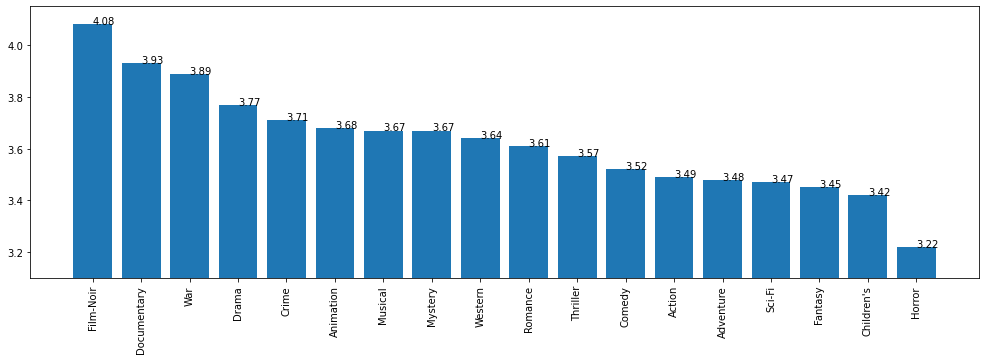

In [25]:
# Calculate the ratings for different genres
genre_ratings = {}
for g in genre_labels:
    genre_ratings[g] = round(movie_ratings[movie_ratings[g] == 1]['rating'].mean(),2)

# sort the ratings from highest to lowest based on genres. 
genre_ratings = {k: v for k, v in sorted(genre_ratings.items(), key=lambda item: item[1],reverse=True)}
#print(genre_ratings)

keys = genre_ratings.keys()
values = genre_ratings.values()
plt.figure(figsize =[17,5])
genre_ratings_bar = plt.bar(keys, values)
plt.ylim(3.1,4.15)
plt.xticks(rotation=90)

for index, value in enumerate(values):
    plt.text(index, value, str(value))

## Genre vs Gender

In [26]:
# Join 3 tables together 
df_all = pd.merge(pd.merge(movies, ratings,on='movie_id'),users,on='user_id')

In [ ]:
df_all[(df_all['Drama'] == 1)&(df_all['gender'] == 'F')]['rating'].count()/df_all[(df_all['gender'] == 'F')]['rating'].count()

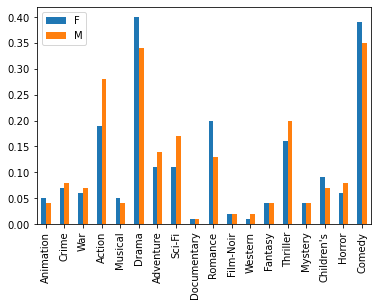

In [177]:
# Calculate the count of each genre for both genders
genre_gender_F = {}
genre_gender_M = {}
for g in genre_labels:
    genre_gender_F[g] = round(df_all[(df_all[g] == 1)&(df_all['gender'] == 'F')]['rating'].count()/df_all[(df_all['gender'] == 'F')]['rating'].count(),2)
    genre_gender_M[g] = round(df_all[(df_all[g] == 1)&(df_all['gender'] == 'M')]['rating'].count()/df_all[(df_all['gender'] == 'M')]['rating'].count(),2)

# Tuen dicts into dataframe
genre_gender_F = pd.DataFrame.from_dict(genre_gender_F,orient='index',columns=['F'])
genre_gender_M = pd.DataFrame.from_dict(genre_gender_M,orient='index',columns=['M'])
genre_gender = genre_gender_F.join(genre_gender_M)

#plt.figure(figsize =[15,5])
genre_gender_bar = genre_gender.plot(kind="bar")
#plt.ylim(3.1,4.15); 

The most popular genres for male are 
- Drama
- Comedy
- Action

The most popular genre for female are:
- Drama
- Comody
- Romance

Significantly more male watched action movies, and significantly more female watched romance movies. 

More male watched Crime, War, Adventure, Sci-Fi, Thriller and Horror.

Documentray has the least watches.

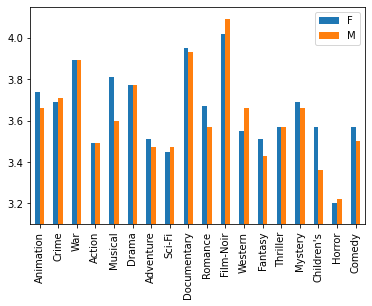

In [175]:
# Calculate the ratings of each genre for both genders
genre_gender_F = {}
genre_gender_M = {}
for g in genre_labels:
    genre_gender_F[g] = round(df_all[(df_all[g] == 1)&(df_all['gender'] == 'F')]['rating'].mean(),2)
    genre_gender_M[g] = round(df_all[(df_all[g] == 1)&(df_all['gender'] == 'M')]['rating'].mean(),2)

# Tuen dicts into dataframe
genre_gender_F = pd.DataFrame.from_dict(genre_gender_F,orient='index',columns=['F'])
genre_gender_M = pd.DataFrame.from_dict(genre_gender_M,orient='index',columns=['M'])
genre_gender = genre_gender_F.join(genre_gender_M)

#plt.figure(figsize =[15,5])
genre_gender_bar = genre_gender.plot(kind="bar")
plt.ylim(3.1,4.15); 

For most genres, female rates higher than male .However, males rate higher than female in Film-Noir, Western, Crime, Horror and Sci-Fi. I also noticed that, female favors Children's movie much more than male. Maybe because female spends more time with their children. Female also rate much higher than male for Musical movies.

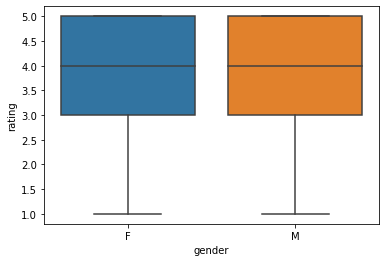

In [204]:
sns.boxplot( y="rating",x='gender', data=df_all[(df_all['Drama']==1)])

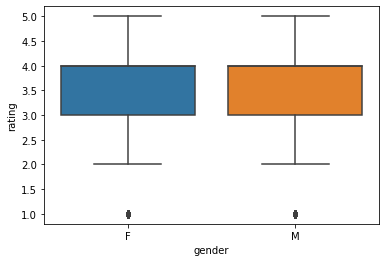

In [179]:
sns.boxplot( y="rating",x='gender', data=df_all[(df_all['Comedy']==1)])

The box plot for a certain genre for different gender does not provide much information.

## Genre vs Age
1: "Under 18"
18: "18-24"
25: "25-34"
35: "35-44"
45: "45-49"
50: "50-55"
56: "56+"

In [28]:
def most_least_popular_genre(df, feature, condition):
    dic = {}
    for g in genre_labels:
        dic[g] = round(df[(df[g] == 1)&(df[feature] == condition)]['rating'].count(),2)
        inverse = [(value, key) for key, value in dic.items()]
    return dic, inverse

In [29]:
ages = ["Under 18", "18-24", "25-34", "35-44", "45-49", "50-55", "56+"]
for a in ages:
    dic, inverse = most_least_popular_genre(df_all, 'age_desc', a)
    print("The MOST popular genre for users that is {} is {} with rating of {}".format(a, max(inverse)[1], max(inverse)[0]))
    print("The LEAST popular genre for users that is {} is {} with rating of {}".format(a, min(inverse)[1], min(inverse)[0]))
    print() 

The HIGHESR rating genre for users that is Under 18 is Comedy with rating of 11162
The LEAST popular genre for users that is Under 18 is Documentary with rating of 130

The HIGHESR rating genre for users that is 18-24 is Comedy with rating of 69980
The LEAST popular genre for users that is 18-24 is Documentary with rating of 1081

The HIGHESR rating genre for users that is 25-34 is Comedy with rating of 143210
The LEAST popular genre for users that is 25-34 is Documentary with rating of 3489

The HIGHESR rating genre for users that is 35-44 is Drama with rating of 71590
The LEAST popular genre for users that is 35-44 is Documentary with rating of 1708

The HIGHESR rating genre for users that is 45-49 is Drama with rating of 32141
The LEAST popular genre for users that is 45-49 is Documentary with rating of 687

The HIGHESR rating genre for users that is 50-55 is Drama with rating of 29247
The LEAST popular genre for users that is 50-55 is Documentary with rating of 555

The HIGHESR rat

For most age groups, the most popular genre is Comedy and Drama and the least popular genre is Documentary.

In [184]:
df_all.age.unique()

array([ 1, 50, 25, 35, 18, 45, 56], dtype=int64)

In [190]:
# Calculate the count of each genre for both genders
genre_age1 = {}
genre_age2 = {}
genre_age3 = {}
genre_age4 = {}
genre_age5 = {}
genre_age6 = {}
genre_age7 = {}

for g in genre_labels:
    genre_age1[g] = round(df_all[(df_all[g] == 1)&(df_all['age'] == 1)]['rating'].count()/df_all[(df_all['age'] == 1)]['rating'].count(),2)
    genre_age2[g] = round(df_all[(df_all[g] == 1)&(df_all['age'] == 18)]['rating'].count()/df_all[(df_all['age'] == 18)]['rating'].count(),2)
    genre_age3[g] = round(df_all[(df_all[g] == 1)&(df_all['age'] == 25)]['rating'].count()/df_all[(df_all['age'] == 25)]['rating'].count(),2)
    genre_age4[g] = round(df_all[(df_all[g] == 1)&(df_all['age'] == 35)]['rating'].count()/df_all[(df_all['age'] == 35)]['rating'].count(),2)
    genre_age5[g] = round(df_all[(df_all[g] == 1)&(df_all['age'] == 45)]['rating'].count()/df_all[(df_all['age'] == 45)]['rating'].count(),2)
    genre_age6[g] = round(df_all[(df_all[g] == 1)&(df_all['age'] == 50)]['rating'].count()/df_all[(df_all['age'] == 50)]['rating'].count(),2)
    genre_age7[g] = round(df_all[(df_all[g] == 1)&(df_all['age'] == 56)]['rating'].count()/df_all[(df_all['age'] == 56)]['rating'].count(),2)

# Tuen dicts into dataframe
genre_age1 = pd.DataFrame.from_dict(genre_age1,orient='index',columns=['Under 18']).reset_index()
genre_age2 = pd.DataFrame.from_dict(genre_age2,orient='index',columns=['18-24']).reset_index()
genre_age3 = pd.DataFrame.from_dict(genre_age3,orient='index',columns=['25-34']).reset_index()
genre_age4 = pd.DataFrame.from_dict(genre_age4,orient='index',columns=['35-44']).reset_index()
genre_age5 = pd.DataFrame.from_dict(genre_age5,orient='index',columns=['45-49']).reset_index()
genre_age6 = pd.DataFrame.from_dict(genre_age6,orient='index',columns=['50-55']).reset_index()
genre_age7 = pd.DataFrame.from_dict(genre_age7,orient='index',columns=['56+']).reset_index()



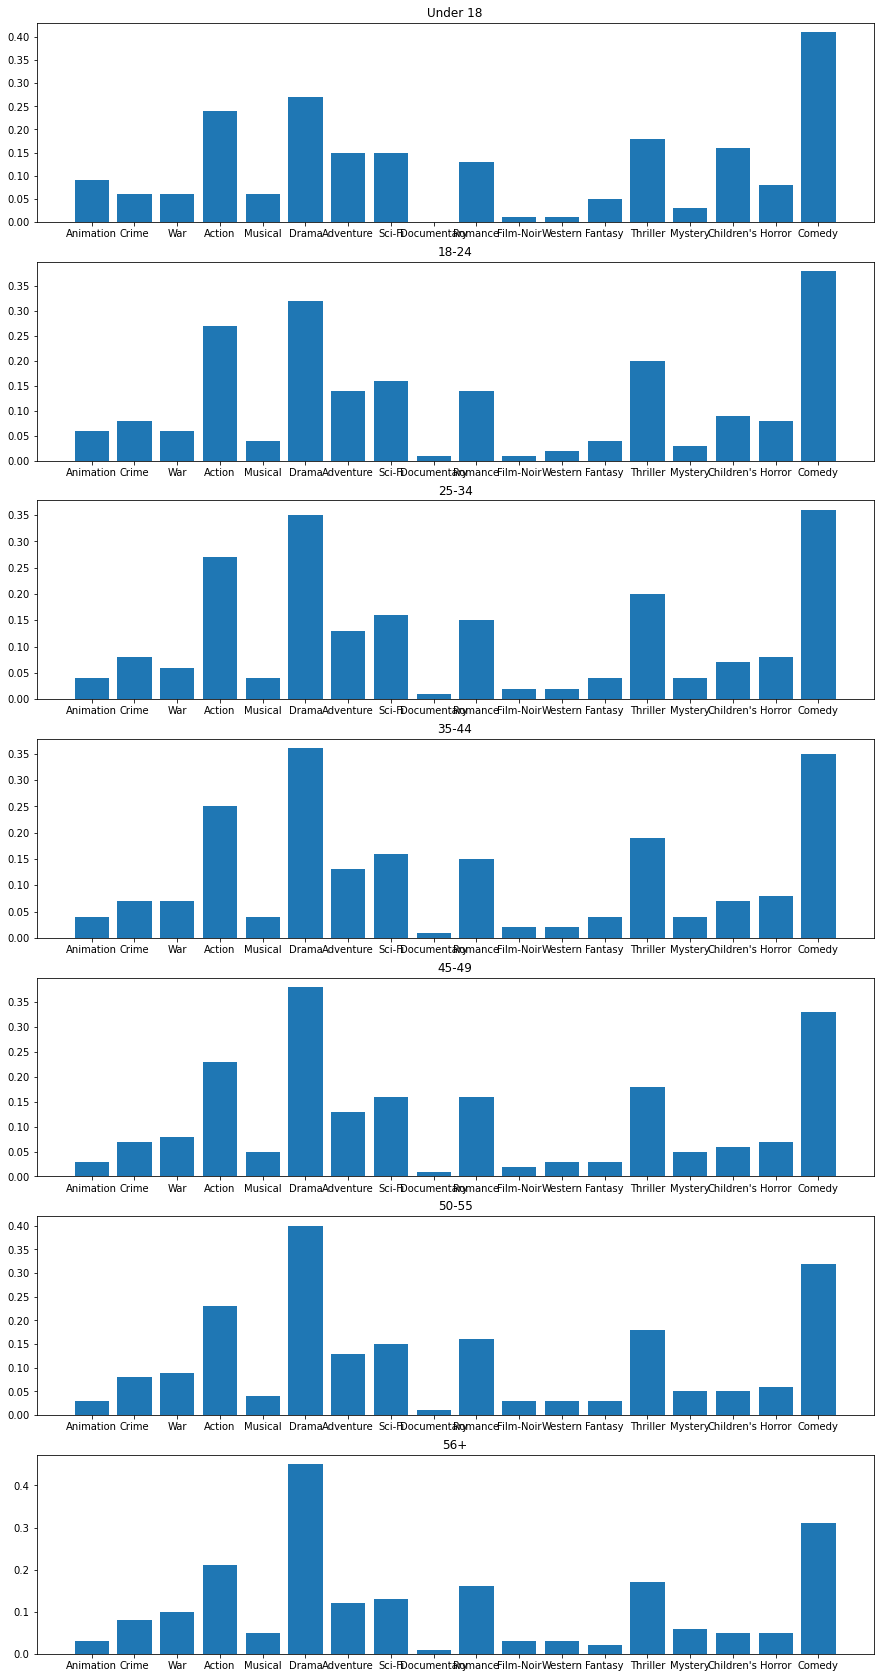

In [199]:
df_com = [genre_age1,genre_age2,genre_age3,genre_age4,genre_age5,genre_age6,genre_age7]
plt.figure(figsize =[15,30])
for x,y,z in zip(range(1,8), df_com, ages):
    plt.subplot(7,1,x)
    plt.bar(y['index'],y[z])
    plt.title(z)

The shape of all these bar chart are ver similiar. The most popular genres are always Drama, Comedy and Action. 
Younger people watches more Children's movies and Animation.

## Genre vs Occupation
	*  0:  "other" or not specified
	*  1:  "academic/educator"
	*  2:  "artist"
	*  3:  "clerical/admin"
	*  4:  "college/grad student"
	*  5:  "customer service"
	*  6:  "doctor/health care"
	*  7:  "executive/managerial"
	*  8:  "farmer"
	*  9:  "homemaker"
	* 10:  "K-12 student"
	* 11:  "lawyer"
	* 12:  "programmer"
	* 13:  "retired"
	* 14:  "sales/marketing"
	* 15:  "scientist"
	* 16:  "self-employed"
	* 17:  "technician/engineer"
	* 18:  "tradesman/craftsman"
	* 19:  "unemployed"
	* 20:  "writer"

In [180]:
occupations = ["other or not specified", "academic/educator", "artist", "clerical/admin",
              "college/grad student", "customer service", "doctor/health care",
              "executive/managerial", "farmer", "homemaker", "K-12 student", "lawyer",
              "programmer", "retired", "sales/marketing", "scientist", "self-employed",
              "technician/engineer", "tradesman/craftsman", "unemployed", "writer" ]
for o in occupations:
    dic, inverse = most_least_popular_genre(df_all, 'occ_desc', o)
    print("The MOST popular genre for users that is {} is {} with rating of {}".format(o,max(inverse)[1], max(inverse)[0]))
    print("The LEAST popular genre for users that is {} is {} with rating of {}".format(o,min(inverse)[1], min(inverse)[0]))
    print()

The MOST popular genre for users that is other or not specified is Comedy with rating of 46500
The LEAST popular genre for users that is other or not specified is Documentary with rating of 1155

The MOST popular genre for users that is academic/educator is Drama with rating of 34769
The LEAST popular genre for users that is academic/educator is Documentary with rating of 794

The MOST popular genre for users that is artist is Drama with rating of 19273
The LEAST popular genre for users that is artist is Documentary with rating of 553

The MOST popular genre for users that is clerical/admin is Comedy with rating of 11870
The LEAST popular genre for users that is clerical/admin is Documentary with rating of 285

The MOST popular genre for users that is college/grad student is Comedy with rating of 48672
The LEAST popular genre for users that is college/grad student is Documentary with rating of 970

The MOST popular genre for users that is customer service is Comedy with rating of 7908


The most popular genres are Comedy and Drama for all occupations. 
Documentary has the least views.

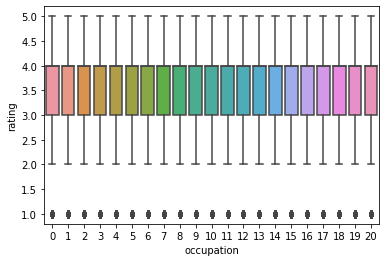

In [205]:
sns.boxplot( y="rating",x='occupation', data=df_all[(df_all['Comedy']==1)])

## Movie Titles
When I search for movies, movie names could play an important role in my decision maling process. 

In [31]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS

From the world cloud, "Love","Man","Night","Life","Day","Time", "Dead" are high frequency words.

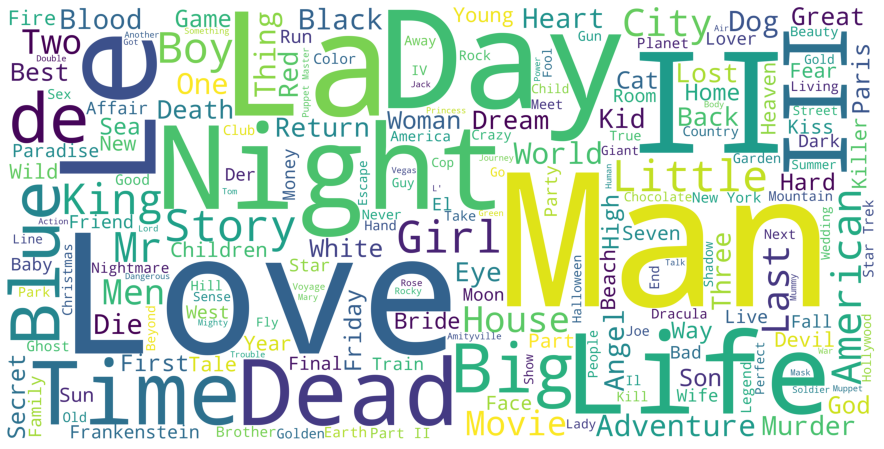

In [32]:
title_corpus = ' '.join(movies['title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

In [33]:
movie_ratings = pd.merge(movies, ratings,on='movie_id')

In [34]:
Love_count = movie_ratings[movie_ratings['title'].str.contains('Love')]['rating'].mean()
Man_count = movie_ratings[movie_ratings['title'].str.contains('Man')]['rating'].mean()
Night_count = movie_ratings[movie_ratings['title'].str.contains('Night')]['rating'].mean()
Day_count = movie_ratings[movie_ratings['title'].str.contains('Day')]['rating'].mean()
Time_count = movie_ratings[movie_ratings['title'].str.contains('Time')]['rating'].mean()
Dead_count = movie_ratings[movie_ratings['title'].str.contains('Dead')]['rating'].mean()

In [35]:
for i in ["Love","Man","Night","Life","Day","Time", "Dead"]:
    rating = movie_ratings[movie_ratings['title'].str.contains(i)]['rating'].mean()
    if rating >= avg_rating:
        print("The avg rating for movies with word {} is {}, which is HIGHER than the avg rating {}".format(i,round(rating,2),round(avg_rating,2)))
    else:
        print("The avg rating for movies with word {} is {}, which is LOWER than the avg rating {}".format(i,round(rating,2),round(avg_rating,2)))

The avg rating for movies with word Love is 3.72, which is HIGHER than the avg rating 3.58
The avg rating for movies with word Man is 3.57, which is LOWER than the avg rating 3.58
The avg rating for movies with word Night is 3.36, which is LOWER than the avg rating 3.58
The avg rating for movies with word Life is 3.92, which is HIGHER than the avg rating 3.58
The avg rating for movies with word Day is 3.71, which is HIGHER than the avg rating 3.58
The avg rating for movies with word Time is 3.58, which is LOWER than the avg rating 3.58
The avg rating for movies with word Dead is 3.48, which is LOWER than the avg rating 3.58


## Save data into csv files

In [36]:
#Check the rating dataset
ratings.head()

,user_id,movie_id,rating,datetime
0,1,1193,5,2000-12-31 22:12:40
1,1,661,3,2000-12-31 22:35:09
2,1,914,3,2000-12-31 22:32:48
3,1,3408,4,2000-12-31 22:04:35
4,1,2355,5,2001-01-06 23:38:11


In [37]:
# save rating as 'ratings_featured.csv'
ratings.to_csv(os.path.join('data', 'ratings_featured.csv'), header=True, index=False)

In [38]:
# Check the users dataset
users.head()

,user_id,gender,age,occupation,zipcode,age_desc,occ_desc
0,1,F,1,10,48067,Under 18,K-12 student
1,2,M,56,16,70072,56+,self-employed
2,3,M,25,15,55117,25-34,scientist
3,4,M,45,7,02460,45-49,executive/managerial
4,5,M,25,20,55455,25-34,writer


In [39]:
# Encode the gender column. Label F as 0 and M as 1.
users.replace({'F':0,'M':1}, inplace=True)

In [40]:
# Remove 'age_desc' and 'occ_desc'
users.drop(['age_desc','occ_desc'],axis=1, inplace=True)

In [41]:
users.head()

,user_id,gender,age,occupation,zipcode
0,1,0,1,10,48067
1,2,1,56,16,70072
2,3,1,25,15,55117
3,4,1,45,7,02460
4,5,1,25,20,55455


In [42]:
# save rating as 'users_featured.csv'
users.to_csv(os.path.join('data', 'users_featured.csv'), header=True, index=False)

In [43]:
# Check the movies dataset
movies.head()

,movie_id,title,genres,War,Comedy,Musical,Thriller,Sci-Fi,Fantasy,Drama,...,Animation,Mystery,Western,Crime,Adventure,Documentary,Film-Noir,Horror,Romance,Children's
0,1,Toy Story (1995),Animation|Children's|Comedy,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,2,Jumanji (1995),Adventure|Children's|Fantasy,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,3,Grumpier Old Men (1995),Comedy|Romance,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,4,Waiting to Exhale (1995),Comedy|Drama,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
# Remove 'genres'
#movies.drop(['genres'],axis=1, inplace=True)

In [45]:
movies.head()

,movie_id,title,genres,War,Comedy,Musical,Thriller,Sci-Fi,Fantasy,Drama,...,Animation,Mystery,Western,Crime,Adventure,Documentary,Film-Noir,Horror,Romance,Children's
0,1,Toy Story (1995),Animation|Children's|Comedy,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,2,Jumanji (1995),Adventure|Children's|Fantasy,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,3,Grumpier Old Men (1995),Comedy|Romance,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,4,Waiting to Exhale (1995),Comedy|Drama,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
# save rating as 'movies_featured.csv'
movies.to_csv(os.path.join('data', 'movies_featured.csv'), header=True, index=False)

## Summary

In this EDA, we analyzed 3 sets of data (users, movies, and ratings). Through data analysis, I found some insightful information. There are 1,000,209 anonymous ratings of 3,883 movies made by 6,040 MovieLens users who joined MovieLens in 2000.

On average, a user rates 165 movies in MovieLens. Most users rate less than 500 movies. Most ratings are located on 3, 4, 5, meaning the users on MovieLens are pretty gentle to the ratings. However, the same ratings might mean differently for each user. For example, the rate 4 for user A could mean "highly recommended", but 4 for user B could be "not very impressive". We need to be careful about the different meanings for ratings for different users. 

Among all users, 72% are male and 28% are female. There are significantly more male users than female users. On average, female users give higher ratings to movies than male users. Female users have an average rating of 3.62 which is slightly higher than male users’ 3.57.

Among all the users, college/grad student, executive/managerial and other are the biggest population. They provide the most ratings. Retailed people gives the highest ratings on average. Unemployed and farmers tends to give the lowest ratings.

Most users are between 18 – 35. Users between 25-34 are the biggest group. Users between 18-24 tends to give the lowest ratings. Older people tends to give higher ratings. 

There are total of 18 different genres. The top 3 genres with the most movies are Drama, Comedy and Action. The Film-Noir has the least movies. However, the Film-Noir has the highest average ratings (4.08). Horror has the lowest average ratings (3.22).

For most genres, female rates higher than male .However, males rate higher than female in Film-Noir, Western, Crime, Horror and Sci-Fi. I also noticed that, female favors Children's movie much more than male. Maybe because female spends more time with their children. Female also rate much higher than male for Musical movies.

For most age groups, the most high-rated movie is Film-Noir and the lowest rated genre is Horror. One thing that we need to notice is that users under 18 give lowest ratings to Children's movies. 

Most occupation give highest ratings to Film-Noir and lowest for Horror. Doctor/health care and homeworker users favor War type movies. Farmer loves documentary. K-12 student give low ratings to Children's movies. Unemployed does not like Children's movies as well.

I also built a wordcloud on the titles of movies, since the title is also a very important factor for my to decide wether to watch the movie. I would like to check if it may have effects to the ratings. The most frequent words are ""Love", "Man", "Night", "Life", "Day", "Time", "Dead". Movies with "Love", "Life" and "Day" has higher ratings. I could build a model based on the movie names. The model should recommend movies with similiarity in titles. 

Through this Exploratory Data Analysis, we find that people in different age group, with different occupation could affect their preference in genre. We could build several content based or collaborative filter model to make recommendations to different types of users based on their user portrait.
